# Exploring the NLTK Book (Chapter 2)

This notebook is based on the exercises described in [NLTK Book, Chapter 2: Accessing Text Corpora and Lexical Resources](https://www.nltk.org/book/ch02.html)
<footer style="text-align:right;font-size:.8em;">Source: Steven Bird, Ewan Klein, and Edward Loper (2009). Natural Language Processing with Python. O’Reilly Media Inc. http://nltk.org/book</footer>


* Corpora in NLTK
* useful Python constructs
* Some Python shortcuts

Resources:
* [NLTK documentation](https://www.nltk.org/)
* [NLTK API Documentaiton](https://www.nltk.org/api/nltk.html)
* [NLTK data and corpus available](http://www.nltk.org/nltk_data/)
* [Corpus HOWTO at NLTK.org](http://www.nltk.org/howto/corpus.html)
* [PyCharm](https://www.jetbrains.com/pycharm/download/#section=mac) An Integrated Data Environment (IDE) for working with Python. Has a greater focus on writing python code
* [BootCat](https://bootcat.dipintra.it/)  Tool for gathering text from the internet.
* [brat rapid annotation tool](http://brat.nlplab.org/index.html)
* [Linguistic Data Consortium](https://www.ldc.upenn.edu/) A source for corpora
* [European Language Resources Association](http://portal.elda.org/en/) Many useful language resource
* [WordNet](https://wordnet.princeton.edu/) provides an onlie database for searching WordNet synsets.
* [Global WordNet](http://globalwordnet.org/) provide information on and sharing of wordnet corpora in many languages.
* [Ethnologue](https://www.ethnologue.com/) Information about every known living language of the world.

## The Gutneberg Corpus

A **corpus** is a large collection of text, texs, documents. 

[Project Gutneberg](https://www.gutenberg.org/) is a large collection (over 57,000) of digitized text for which copyright has expired, i.e. they are freely available.

NLTK includes serveral corpus resources as part of its corpus module. 
To begin we will need to download the module. We will only download the guteneberg corpus but there are many more corpera in the corpus module. It is more common to only download the portions that are necessary. When we initiate the downloader you can see all the options. 

In [1]:
# import nltk and look at the gutneberg corpus texts
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Now we can access the gutenberg corpus. Observe that every text in the corpus has a `fileid`. We use this when we want to access the text.

In [4]:
# I am going to add a keyword for the corpus to make refering to it easier. 
# note that this may make it difficult for others to read when sharing notebooks.
from nltk.corpus import gutenberg as gtb
gtb.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

First let's pick one of these texts and take a quick look at it. 

In [6]:
paradise_lost = nltk.corpus.gutenberg.words('milton-paradise.txt')
len(paradise_lost)

96825

In [7]:
paradise_lost.concordance('alone')

AttributeError: 'StreamBackedCorpusView' object has no attribute 'concordance'

You can see a difference between the corpus module and the book module that we used earlier. We need to get our data in the right shape to start examining it as text.

In [32]:
paradise_lost.citation()

AttributeError: 'StreamBackedCorpusView' object has no attribute 'citation'

In [8]:
type(paradise_lost)

nltk.corpus.reader.util.StreamBackedCorpusView

To use the same viewer we used in the book module we need to transform the Gutenberg text into `Text` data type. Import the gutenberg corpus and transform it into an NLTK `text.Text` so we can work with is as we did the book collection in Chapter 1.

In [9]:
paradise_lost_Text = nltk.Text(nltk.corpus.gutenberg.words('milton-paradise.txt'))
paradise_lost_Text.concordance('alone')

Displaying 25 of 40 matches:
d So hardy as to proffer or accept , Alone , the dreadful voyage ; till , at la
 their mighty Paramount , and seemed Alone th ' antagonist of Heaven , nor less
hout my opening . Pensive here I sat Alone ; but long I sat not , till my womb 
h your spacious empire up to light , Alone and without guide , half lost , I se
ight , Son of my bosom , Son who art alone . My word , my wisdom , and effectua
 land , the Fiend Walked up and down alone , bent on his prey ; Alone , for oth
 and down alone , bent on his prey ; Alone , for other creature in this place ,
ought me from the quires of Cherubim Alone thus wandering . Brightest Seraph , 
that walks Invisible , except to God alone , By his permissive will , through H
ither From thy empyreal mansion thus alone , To witness with thine eyes what so
e He marked and mad demeanour , then alone , As he supposed , all unobserved , 
lity . So little knows Any , but God alone , to value right The good before him
e , linked 

Let's continue to work with a text from the gutneberg corpus

In [11]:
gtb.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

We can write a short function to look at some of the characteristics of the gutenberg texts. This will show us the average word length, the average number of words per sentence, and how often words in the vocabulary are used.

In [16]:
for file in gtb.fileids():
    #the number of characters in a file
    char = len(gtb.raw(file))
    #the number of words in a file
    words = len(gtb.words(file))
    #the number of senteces in a file
    sent = len(gtb.sents(file))
    #the unique collection of words i.e. no repeats
    vocab = len(set(w.lower() for w in gtb.words(file)))
    print (file + '\n  avg word length: ' + str(round(char/words)) + '\n  avg sentence length: ' + str(round(words/sent)) + '\n  times vocab used: ' + str(round(words/vocab)))

austen-emma.txt
  avg word length: 5
  avg sentence length: 25
  times vocab used: 26
austen-persuasion.txt
  avg word length: 5
  avg sentence length: 26
  times vocab used: 17
austen-sense.txt
  avg word length: 5
  avg sentence length: 28
  times vocab used: 22
bible-kjv.txt
  avg word length: 4
  avg sentence length: 34
  times vocab used: 79
blake-poems.txt
  avg word length: 5
  avg sentence length: 19
  times vocab used: 5
bryant-stories.txt
  avg word length: 4
  avg sentence length: 19
  times vocab used: 14
burgess-busterbrown.txt
  avg word length: 4
  avg sentence length: 18
  times vocab used: 12
carroll-alice.txt
  avg word length: 4
  avg sentence length: 20
  times vocab used: 13
chesterton-ball.txt
  avg word length: 5
  avg sentence length: 20
  times vocab used: 12
chesterton-brown.txt
  avg word length: 5
  avg sentence length: 23
  times vocab used: 11
chesterton-thursday.txt
  avg word length: 5
  avg sentence length: 18
  times vocab used: 11
edgeworth-parents.tx

In [19]:
#notice raw() returns the untokenized version of the text. compare the two functions below
print(gtb.raw('blake-poems.txt'))

[Poems by William Blake 1789]

 
SONGS OF INNOCENCE AND OF EXPERIENCE
and THE BOOK of THEL


 SONGS OF INNOCENCE
 
 
 INTRODUCTION
 
 Piping down the valleys wild,
   Piping songs of pleasant glee,
 On a cloud I saw a child,
   And he laughing said to me:
 
 "Pipe a song about a Lamb!"
   So I piped with merry cheer.
 "Piper, pipe that song again;"
   So I piped: he wept to hear.
 
 "Drop thy pipe, thy happy pipe;
   Sing thy songs of happy cheer:!"
 So I sang the same again,
   While he wept with joy to hear.
 
 "Piper, sit thee down and write
   In a book, that all may read."
 So he vanish'd from my sight;
   And I pluck'd a hollow reed,
 
 And I made a rural pen,
   And I stain'd the water clear,
 And I wrote my happy songs
   Every child may joy to hear.
 
 
 THE SHEPHERD
 
 How sweet is the Shepherd's sweet lot!
 From the morn to the evening he stays;
 He shall follow his sheep all the day,
 And his tongue shall be filled with praise.
 
 For he hears the lambs' innocent call,
 And

In [21]:
print(gtb.words('blake-poems.txt'))

['[', 'Poems', 'by', 'William', 'Blake', '1789', ']', ...]


In [25]:
#find the longest sentence in a text:
hamlet = gtb.sents('shakespeare-hamlet.txt')
longest_sent = max(len(s) for s in hamlet)
[s for s in hamlet if len(s) == longest_sent]

[['To',
  'thine',
  'owne',
  'peace',
  ':',
  'if',
  'he',
  'be',
  'now',
  'return',
  "'",
  'd',
  ',',
  'As',
  'checking',
  'at',
  'his',
  'Voyage',
  ',',
  'and',
  'that',
  'he',
  'meanes',
  'No',
  'more',
  'to',
  'vndertake',
  'it',
  ';',
  'I',
  'will',
  'worke',
  'him',
  'To',
  'an',
  'exployt',
  'now',
  'ripe',
  'in',
  'my',
  'Deuice',
  ',',
  'Vnder',
  'the',
  'which',
  'he',
  'shall',
  'not',
  'choose',
  'but',
  'fall',
  ';',
  'And',
  'for',
  'his',
  'death',
  'no',
  'winde',
  'of',
  'blame',
  'shall',
  'breath',
  ',',
  'But',
  'euen',
  'his',
  'Mother',
  'shall',
  'vncharge',
  'the',
  'practice',
  ',',
  'And',
  'call',
  'it',
  'accident',
  ':',
  'Some',
  'two',
  'Monthes',
  'hence',
  'Here',
  'was',
  'a',
  'Gentleman',
  'of',
  'Normandy',
  ',',
  'I',
  "'",
  'ue',
  'seene',
  'my',
  'selfe',
  ',',
  'and',
  'seru',
  "'",
  'd',
  'against',
  'the',
  'French',
  ',',
  'And',
  'they',
  '

In [34]:
gtb.sents('shakespeare-hamlet.txt')

[['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']'], ['Actus', 'Primus', '.'], ...]

In [27]:
type(hamlet)

nltk.corpus.reader.util.StreamBackedCorpusView

You have seen the Gutenberg NLTK corpus reader has the following access methods: `raw()`, `words()` and `sents()`. Other corpa typically have these methods and may also provide more detailed access such as parts of speech access.

## Web and Chat Corpus

### web
This corpus is less formal prose and more representative of common language usage. It is made up of content from a Firefox discussion forum, conversations overheard in New York, the movie script of Pirates of the Carribean, personal advertisements, and wine reviews

In [35]:
from nltk.corpus import webtext

In [36]:
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [40]:
grail = webtext.sents('grail.txt')
print(grail)

[['SCENE', '1', ':', '[', 'wind', ']', '[', 'clop', 'clop', 'clop', ']', 'KING', 'ARTHUR', ':', 'Whoa', 'there', '!'], ['[', 'clop', 'clop', 'clop', ']', 'SOLDIER', '#', '1', ':', 'Halt', '!'], ...]


In [41]:
singles = webtext.raw('singles.txt')
print(singles)

25 SEXY MALE, seeks attrac older single lady, for discreet encounters.
35YO Security Guard, seeking lady in uniform for fun times.
40 yo SINGLE DAD, sincere friendly DTE seeks r/ship with fem age open S/E
44yo tall seeks working single mum or lady below 45 fship rship. Nat Open
6.2 35 yr old OUTGOING M seeks fem 28-35 for o/door sports - w/e away
A professional business male, late 40s, 6 feet tall, slim build, well groomed, great personality, home owner, interests include the arts travel and all things good, Ringwood area, is seeking a genuine female of similar age or older, in same area or surrounds, for a meaningful long term rship. Looking forward to hearing from you all.
ABLE young man seeks, sexy older women. Phone for fun ready to play
AFFECTIONATE LADY Sought by generous guy, 40s, mutual fulfillment
ARE YOU ALONE or lost in a r/ship too, with no hope in sight? Maybe we could explore new beginnings together? Im 45 Slim/Med build, GSOH, high needs and looking for someone similar. 

### chat
NLTK contains a corpus of instant messaging chat sessions "originally collected by the Naval Postgraduate School for research on automatic detection of Internet predators." The corpus contains over 10,000 texts that have been anonamized. The fles contain chats from age specific chat rooms for a specific date. Some metadata is contained in the filename: date, chatroom, and number of posts (e.g. 10-19-20s_706posts.xml --> Date = 10-19, chatroom = 20's, number of posts = 706.)

In [42]:
from nltk.corpus import nps_chat
for file in nps_chat.fileids():
    print(file)

10-19-20s_706posts.xml
10-19-30s_705posts.xml
10-19-40s_686posts.xml
10-19-adults_706posts.xml
10-24-40s_706posts.xml
10-26-teens_706posts.xml
11-06-adults_706posts.xml
11-08-20s_705posts.xml
11-08-40s_706posts.xml
11-08-adults_705posts.xml
11-08-teens_706posts.xml
11-09-20s_706posts.xml
11-09-40s_706posts.xml
11-09-adults_706posts.xml
11-09-teens_706posts.xml


In [43]:
chat = nps_chat.posts('10-19-adults_706posts.xml')

In [44]:
len(chat)

706

In [45]:
chat[100:120]

[['U37', '-', 'Stop', 'flooding', 'the', 'room', 'hon'],
 ['can', 'i', 'get', 'an', 'amen', 'for', 'myspace'],
 ['Hello', 'lovelies'],
 ['a'],
 ['alo'],
 ['U36'],
 ['.', 'ACTION', 'peeks', 'in', '.'],
 ['PART'],
 ['JOIN'],
 ['.', 'ACTION', 'pokes', 'U1', '.'],
 ['JOIN'],
 ['PART'],
 ['what', 'are', 'you', 'talking', 'about', 'U35'],
 ['JOIN'],
 ['.', 'ACTION', 'pokes', 'U1', '.'],
 ['PART'],
 ['whoopZ', 'slipped'],
 ['well', 'then', 'get', 'Tina', 'in', 'here', 'U23'],
 ['.', 'ACTION', 'be', "'s", 'poked', '.'],
 ['ha', 'ha', 'ha', 'U23', '!!!']]

Note: 'U##' is the anonamized username.

## Brown Corpus
"The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on." 

Sample:

|ID |File	|Genre	|Description|
|----|----|---------|---------|
|A16	|ca16	|news	|Chicago Tribune: Society Reportage|
|B02	|cb02	|editorial	|Christian Science Monitor: Editorials|
|C17	|cc17	|reviews	|Time Magazine: Reviews|
|D12	|cd12	|religion	|Underwood: Probing the Ethics of Realtors|
|E36	|ce36	|hobbies	|Norling: Renting a Car in Europe|

For a complete genre list, see http://icame.uib.no/brown/bcm-los.html).

For a more detailed overview [The Brown Corpus Manual](http://www.hit.uib.no/icame/brown/bcm.html)

First lets import the Brown Corpus and see what the categories are.

In [46]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

We can also get a list of the files. 

In [51]:
brown.fileids()

['ca01',
 'ca02',
 'ca03',
 'ca04',
 'ca05',
 'ca06',
 'ca07',
 'ca08',
 'ca09',
 'ca10',
 'ca11',
 'ca12',
 'ca13',
 'ca14',
 'ca15',
 'ca16',
 'ca17',
 'ca18',
 'ca19',
 'ca20',
 'ca21',
 'ca22',
 'ca23',
 'ca24',
 'ca25',
 'ca26',
 'ca27',
 'ca28',
 'ca29',
 'ca30',
 'ca31',
 'ca32',
 'ca33',
 'ca34',
 'ca35',
 'ca36',
 'ca37',
 'ca38',
 'ca39',
 'ca40',
 'ca41',
 'ca42',
 'ca43',
 'ca44',
 'cb01',
 'cb02',
 'cb03',
 'cb04',
 'cb05',
 'cb06',
 'cb07',
 'cb08',
 'cb09',
 'cb10',
 'cb11',
 'cb12',
 'cb13',
 'cb14',
 'cb15',
 'cb16',
 'cb17',
 'cb18',
 'cb19',
 'cb20',
 'cb21',
 'cb22',
 'cb23',
 'cb24',
 'cb25',
 'cb26',
 'cb27',
 'cc01',
 'cc02',
 'cc03',
 'cc04',
 'cc05',
 'cc06',
 'cc07',
 'cc08',
 'cc09',
 'cc10',
 'cc11',
 'cc12',
 'cc13',
 'cc14',
 'cc15',
 'cc16',
 'cc17',
 'cd01',
 'cd02',
 'cd03',
 'cd04',
 'cd05',
 'cd06',
 'cd07',
 'cd08',
 'cd09',
 'cd10',
 'cd11',
 'cd12',
 'cd13',
 'cd14',
 'cd15',
 'cd16',
 'cd17',
 'ce01',
 'ce02',
 'ce03',
 'ce04',
 'ce05',
 'ce06',
 

We can get a collection of texts based on the category

In [64]:
mystery = brown.fileids(categories='mystery')

In [65]:
print(mystery)

['cl01', 'cl02', 'cl03', 'cl04', 'cl05', 'cl06', 'cl07', 'cl08', 'cl09', 'cl10', 'cl11', 'cl12', 'cl13', 'cl14', 'cl15', 'cl16', 'cl17', 'cl18', 'cl19', 'cl20', 'cl21', 'cl22', 'cl23', 'cl24']


We can also get the text of these files.

In [71]:
mystery_text=brown.words(categories='mystery')

In [73]:
print(len(mystery_text))
print(mystery_text)

57169
['There', 'were', 'thirty-eight', 'patients', 'on', ...]


There are many ways to access the text in the Brown corpus.

In [74]:
brown.words(fileids=['cg17'])

['After', 'only', 'eighteen', 'years', 'of', ...]

In [75]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

One interesting exercise to do with this Corpus is to look at word use across different categories using Frequency Distribution.

In [77]:
news_text = brown.words(categories='news')
fq_dist = nltk.FreqDist(w.lower() for w in news_text)
word_list = ['death','freedom','space','alien']
for w in word_list:
    print (w + ':',fq_dist[w], end='\n')

death: 10
freedom: 6
space: 3
alien: 0


This is a good place to introduce Conditional Frequency Distribution. This will allow us to look at the distribution of words across corpus based on specific conditions. In this case the condition is that it be a part of one of the genre we choose.

In [78]:
con_fq_dist = nltk.ConditionalFreqDist((genre,word)
                   for genre in brown.categories()
                   for word in brown.words(categories=genre))
genre_list=['science_fiction','news']
word_list = ['alien','death','freedom']
con_fq_dist.tabulate(conditions=genre_list,samples=word_list)

                  alien   death freedom 
science_fiction       3       2       0 
           news       0      10       4 


## Reuters Corpus

This is a collection of news articles from Reuters. The collection documents have 90 classification topics and it is divided into test and training files for testing automatic document classification alogrithms. This begins to get into the area of machine learning and we will discuss this in more detail later. 


In [79]:
from nltk.corpus import reuters 

In [85]:
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [84]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [83]:
# We can find texts based on category.
reuters.fileids('yen')

['test/14913',
 'test/15400',
 'test/15432',
 'test/15454',
 'test/15455',
 'test/15483',
 'test/15503',
 'test/15549',
 'test/18363',
 'test/18370',
 'test/19061',
 'test/20862',
 'test/21542',
 'test/21573',
 'training/10364',
 'training/10679',
 'training/10681',
 'training/10684',
 'training/10689',
 'training/10696',
 'training/10718',
 'training/10762',
 'training/10766',
 'training/10769',
 'training/10770',
 'training/10804',
 'training/11203',
 'training/11254',
 'training/11764',
 'training/11772',
 'training/12145',
 'training/12470',
 'training/13544',
 'training/14767',
 'training/1926',
 'training/2178',
 'training/2190',
 'training/2286',
 'training/2354',
 'training/3419',
 'training/3421',
 'training/3532',
 'training/4633',
 'training/4675',
 'training/4680',
 'training/4703',
 'training/4709',
 'training/5204',
 'training/5206',
 'training/5271',
 'training/6338',
 'training/6357',
 'training/872',
 'training/9149',
 'training/9213',
 'training/9222',
 'training/9698

In [90]:
reuters.words('training/9946')[:40]

['DOLLAR',
 '/',
 'YEN',
 'INTERVENTION',
 'RESPONDS',
 'TO',
 'PRESSURE',
 'The',
 'Bank',
 'of',
 'France',
 'intervened',
 'to',
 'buy',
 'small',
 'amounts',
 'of',
 'dollars',
 'and',
 'sell',
 'yen',
 'in',
 'Paris',
 'today',
 'to',
 'stabilise',
 'the',
 'exchange',
 'rates',
 'agreed',
 'at',
 'last',
 'month',
 "'",
 's',
 'meeting',
 'of',
 'Finance',
 'Ministers',
 'of']

In [91]:
reuters.sents('training/9946')

[['DOLLAR', '/', 'YEN', 'INTERVENTION', 'RESPONDS', 'TO', 'PRESSURE', 'The', 'Bank', 'of', 'France', 'intervened', 'to', 'buy', 'small', 'amounts', 'of', 'dollars', 'and', 'sell', 'yen', 'in', 'Paris', 'today', 'to', 'stabilise', 'the', 'exchange', 'rates', 'agreed', 'at', 'last', 'month', "'", 's', 'meeting', 'of', 'Finance', 'Ministers', 'of', 'the', 'Group', 'of', 'Five', 'and', 'Canada', ',', 'foreign', 'exchange', 'dealers', 'said', '.'], ['But', 'they', 'said', 'recent', 'central', 'bank', 'intervention', 'in', 'the', 'foreign', 'exchange', 'markets', 'appeared', 'to', 'be', 'a', 'limited', 'reaction', 'to', 'temporary', 'pressures', 'rather', 'than', 'a', 'major', 'defence', 'operation', '.'], ...]

## Inaugural Address Corpus

This is a collection of 55 inaugaural addressed. This collection is interesting because it contains temporal data that can be used to look at changes in the text across time. 

In [92]:
from nltk.corpus import inaugural

In [95]:
# Note the file name contains the year of the speech and the name of the president
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [96]:
inaugural.words('2009-Obama.txt')

['My', 'fellow', 'citizens', ':', 'I', 'stand', 'here', ...]

The year of each text appears in the file ID. To get the year you must extract it from the title. 

In [98]:
years = [file[:4] for file in inaugural.fileids()]
years

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009']

Now we can use the Conditional Frequency Distribution again to get the freq distribution of particular words in each year

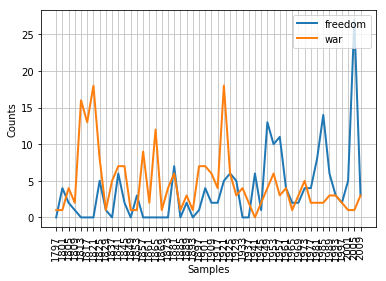

In [103]:
# plot the use of words in speeched over time.
con_fq_dist = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
        for w in inaugural.words(fileid)
            for target in ['war','freedom']
            if w.lower().startswith(target))

%matplotlib inline
con_fq_dist.plot()

## Load your own corpus

if you have a collection of files you can load it using the NLTK PlaintextCorpusReader. I have created a collection of text from the internet by doing a web scrape for pages about funny cat videos using [BootCat](https://bootcat.dipintra.it/). Import this corpus and use the tools we have looked at to explore what it might contain. Full disclosure: I have note looked at it closely so I cannot tell you anything about it either. 

In [104]:
from nltk.corpus import PlaintextCorpusReader
root = "cat_corpus"
cats = PlaintextCorpusReader(root, '.*')
cats.fileids()

['00.txt',
 '01.txt',
 '02.txt',
 '03.txt',
 '04.txt',
 '05.txt',
 '06.txt',
 '07.txt',
 '08.txt',
 '09.txt',
 '10.txt',
 '11.txt',
 '12.txt',
 '13.txt',
 '14.txt',
 '15.txt',
 '16.txt',
 '17.txt',
 '18.txt',
 '19.txt',
 '20.txt',
 '21.txt',
 '22.txt',
 '23.txt',
 '24.txt',
 '25.txt',
 '26.txt',
 '27.txt',
 '28.txt',
 '29.txt',
 '31.txt',
 '32.txt',
 '33.txt',
 '34.txt',
 '35.txt',
 '36.txt',
 '37.txt',
 '38.txt',
 '39.txt',
 '40.txt',
 '41.txt',
 '42.txt',
 '44.txt',
 '45.txt',
 '46.txt',
 '47.txt',
 '48.txt',
 '49.txt',
 '52.txt',
 '53.txt',
 '54.txt',
 '55.txt',
 '56.txt',
 '57.txt',
 '58.txt',
 '59.txt',
 '60.txt',
 '61.txt',
 '62.txt',
 '63.txt',
 '64.txt',
 '65.txt',
 '66.txt',
 '67.txt',
 '68.txt',
 '69.txt',
 '70.txt',
 '71.txt',
 '72.txt',
 '73.txt',
 '74.txt',
 '75.txt',
 '76.txt',
 '77.txt',
 '78.txt',
 '79.txt',
 '80.txt',
 '81.txt',
 '82.txt']

In [107]:
cats.words('80.txt')[:100]

['Rating',
 'is',
 'available',
 'when',
 'the',
 'video',
 'has',
 'been',
 'rented',
 '.',
 'This',
 'feature',
 'is',
 'not',
 'available',
 'right',
 'now',
 '.',
 'Please',
 'try',
 'again',
 'later',
 '.',
 'Published',
 'on',
 'Jun',
 '8',
 ',',
 '2018',
 'Look',
 'at',
 'all',
 'these',
 'super',
 'hilarious',
 'cats',
 'and',
 'kittens',
 '!',
 'Aren',
 "'",
 't',
 'cat',
 'videos',
 'just',
 'the',
 'best',
 '?!',
 'Cats',
 'are',
 'super',
 'funny',
 'animals',
 'and',
 'they',
 'never',
 'fail',
 'to',
 'make',
 'us',
 'laugh',
 'and',
 'happy',
 '!',
 'This',
 'is',
 'the',
 'hardest',
 'TRY',
 'NOT',
 'TO',
 'LAUGH',
 'challenge',
 'ever',
 '!',
 'Just',
 'look',
 'how',
 'all',
 'these',
 'cats',
 'and',
 'kittens',
 'behave',
 ',',
 'play',
 ',',
 'fail',
 ',',
 'make',
 'funny',
 'sounds',
 ',',
 'react',
 'to',
 'different',
 'things',
 ',...',
 'So',
 'ridiculous']

In [108]:
cats.sents('01.txt')

[['Top', '5', 'Funny', 'Cat', 'Tricks', '1', '/', '6', 'Top', '5', 'Funny', 'Cat', 'Tricks', 'iStockphoto', '/', 'Thinkstock', '(', '3', ')', '|', 'Mario', 'Tama', '/', 'Getty', 'Images', '|', 'Sami', 'Sarkis', '/', 'Getty', 'Images', '|', 'GK', 'Hart', '/', 'Vikki', 'Hart', '/', 'Getty', 'Images', 'Watching', 'cats', 'do', 'even', 'the', 'simplest', 'trick', 'is', 'a', 'treat', 'because', ',', 'while', 'dogs', 'do', 'tricks', 'to', 'please', 'their', 'people', ',', 'cats', 'perform', 'only', 'if', 'they', 'really', 'feel', 'like', 'it', '...', 'and', 'often', ',', 'they', 'don', "'", 't', '.'], ['However', ',', 'the', 'popular', 'belief', 'that', 'cats', 'cannot', 'be', 'trained', 'is', 'wrong', '.'], ...]

Try reusing code from earlier examinations and think about:

* Is there anything you wish you had a function for?
* What types of features are most useful?
* Is there anything missing from the data you wish you had?

In [109]:
# can we adapt this code from the gutenberg corpus to give us a broad overview of this cat corpus.
for file in gtb.fileids():
    #the number of characters in a file
    char = len(gtb.raw(file))
    #the number of words in a file
    words = len(gtb.words(file))
    #the number of senteces in a file
    sent = len(gtb.sents(file))
    #the unique collection of words i.e. no repeats
    vocab = len(set(w.lower() for w in gtb.words(file)))
    print (file + '\n  avg word length: ' + str(round(char/words)) + '\n  avg sentence length: ' + str(round(words/sent)) + '\n  times vocab used: ' + str(round(words/vocab)))

austen-emma.txt
  avg word length: 5
  avg sentence length: 25
  times vocab used: 26
austen-persuasion.txt
  avg word length: 5
  avg sentence length: 26
  times vocab used: 17
austen-sense.txt
  avg word length: 5
  avg sentence length: 28
  times vocab used: 22
bible-kjv.txt
  avg word length: 4
  avg sentence length: 34
  times vocab used: 79
blake-poems.txt
  avg word length: 5
  avg sentence length: 19
  times vocab used: 5
bryant-stories.txt
  avg word length: 4
  avg sentence length: 19
  times vocab used: 14
burgess-busterbrown.txt
  avg word length: 4
  avg sentence length: 18
  times vocab used: 12
carroll-alice.txt
  avg word length: 4
  avg sentence length: 20
  times vocab used: 13
chesterton-ball.txt
  avg word length: 5
  avg sentence length: 20
  times vocab used: 12
chesterton-brown.txt
  avg word length: 5
  avg sentence length: 23
  times vocab used: 11
chesterton-thursday.txt
  avg word length: 5
  avg sentence length: 18
  times vocab used: 11
edgeworth-parents.tx

## Conditional Frequency Distributions

We used the Conditional Frequency Distributions utility earlier. Let's go back to that and see how it works.

This method of analysis generates a frequency distribution for a text that meets a certain criteria set out. With Conditional Frequency Distribution we can categorize and compare frequency distribution based on conditions we set out. For example, we could compare the frequency of color in different genre of text from the Brown Corpus; how often is color used in romance compared to science fiction.

To begin we must understand that in conditional frequency we are not just comparing a list of words:

`['red','green','blue','gold','yellow']`

But we are looking at the frequency of a pair of terms, the condition and the term:

`[('romance','red'),('romance','green'),('romance','blue'),('romance','gold'),('romance','yellow')]`

Let's try this with the Browm Corpus

In [112]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [113]:
# create a word list based on our criteria of romance and science fiction:
genre_wordlist = [(genre,word)
                 for genre in ['romance', 'science_fiction']
                 for word in brown.words(categories=genre)]

In [24]:
# let's look at the list we create.
# notice that we have a list of tuples.
genre_wordlist[:6], genre_wordlist[-6:]

([('romance', 'They'),
  ('romance', 'neither'),
  ('romance', 'liked'),
  ('romance', 'nor'),
  ('romance', 'disliked'),
  ('romance', 'the')],
 [('science_fiction', 'I'),
  ('science_fiction', 'get'),
  ('science_fiction', 'out'),
  ('science_fiction', 'of'),
  ('science_fiction', 'pain'),
  ('science_fiction', '.')])

We can see that we now have each word paired with the category. Understandably this is a large list.


In [114]:
len(genre_wordlist)

84492

Now we can use the `ConditionalFreqDist` to look at the difference in distribution.

In [115]:
# This will show us the frequency distribution of all words in each genre we chose for our list
cfd = nltk.ConditionalFreqDist(genre_wordlist)
cfd

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'romance': FreqDist({'They': 69,
                               'neither': 7,
                               'liked': 12,
                               'nor': 5,
                               'disliked': 4,
                               'the': 2758,
                               'Old': 17,
                               'Man': 13,
                               '.': 3736,
                               'To': 15,
                               'them': 142,
                               'he': 702,
                               'could': 193,
                               'have': 258,
                               'been': 179,
                               'broken': 8,
                               'bell': 4,
                               'in': 875,
                               'church': 29,
                               'tower': 1,
                               'which': 104,
                               '

In [116]:
# look at each of the distributions
print(cfd['romance'])

<FreqDist with 8452 samples and 70022 outcomes>


In [117]:
print(cfd['science_fiction'])

<FreqDist with 3233 samples and 14470 outcomes>


In [118]:
cfd['romance'].most_common(10),cfd['science_fiction'].most_common(10)

([(',', 3899),
  ('.', 3736),
  ('the', 2758),
  ('and', 1776),
  ('to', 1502),
  ('a', 1335),
  ('of', 1186),
  ('``', 1045),
  ("''", 1044),
  ('was', 993)],
 [(',', 791),
  ('.', 786),
  ('the', 652),
  ('of', 321),
  ('to', 305),
  ('and', 278),
  ('``', 235),
  ("''", 235),
  ('a', 222),
  ('was', 198)])

We should probably start making removing punctuation and stopwords a habit.

### plot() and tabulate()

With `plot()` we can plot out the frequency of a distribution on a graph. This is often useful when time is a a variable, as we did with the inaugural address. However, building on our previous example we can select some key words and plot the differences.

In [119]:
color_dif = nltk.ConditionalFreqDist(
    (genre,word)
    for genre in ['romance','science_fiction']
    for w in brown.words(categories=genre)
    for word in ['red','gold','black','white','yellow'] if w.lower() == word)

In [126]:
type(color_dif)

nltk.probability.ConditionalFreqDist

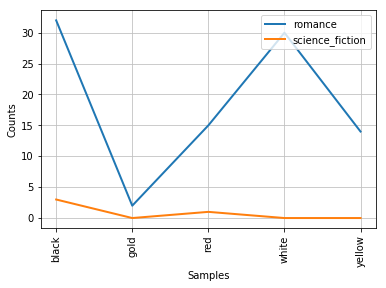

In [125]:
color_dif.plot()

We can also represent this Conditional Frequency Distribution in a table.

In [134]:
color_dif.tabulate()

                 black   gold    red  white yellow 
        romance     32      2     15     30     14 
science_fiction      3      0      1      0      0 



And use keywords to refine the table.

In [135]:
color_dif.tabulate(conditions = ['romance','science_fiction'],samples=['black','white','red'])

                black white   red 
        romance    32    30    15 
science_fiction     3     0     1 


Have you ever wondered what category talks about what day mostr frequently?

In [140]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [141]:
cfd_days = nltk.ConditionalFreqDist(
        (genre,word)
        for genre in ['news','romance']
        for word in brown.words(categories=genre))
         
        

In [142]:
cfd_days.tabulate(samples=days)

           Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
   news        54        43        22        20        41        33        51 
romance         2         3         3         1         3         4         5 


## Lexical Resources

### Stopwords

There is a corpus availael in nltk that is a collection of words and punctuation that occur with a high-frequency but do not affect meaning of a text. THese are words like 'a', 'the', 'but'. These stop words can often be filtered out of a text to remove 'noise' from some types of analysis, such as analysing subject matter. 

In [143]:
# take a look at the stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [144]:
#You can see that stopwords are availabel in many languages.
stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish',
 'turkish']

**Let's look at a text with and without the stopwords and see how it impacts the results.**

In [151]:
def stopword_distribution(text):
    stopwords = nltk.corpus.stopwords.words('english')
    count = [word for word in text if word.lower() in stopwords]
    print ('Count of stopwords in text: ' + str(len(count)) + ' out of a total of ' + str(len(text)) + ' words')
    print ('That is a text that is',(len(count)/len(text)*100),'% stopwords, not including punctuation.')
    
stopword_distribution(nltk.corpus.brown.words(categories='romance'))

Count of stopwords in text: 29864 out of a total of 70022 words
That is a text that is 42.64945302904801 % stopwords, not including punctuation.


#### Names Corpus
There is also a wordlist of 8,000 first names sorted by gender into separate files. You can use this to find names in text.

In [152]:
# For this we can see what names are shared by men and women
from nltk.corpus import names
names.fileids()

['female.txt', 'male.txt']

By looking at names that appear in both lists we can generate a list of names that are not gender specific.

In [153]:
nongendered_names = [name for name in names.words('male.txt') if name in names.words('female.txt')]

In [154]:
nongendered_names

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

In [155]:
len(nongendered_names)

365

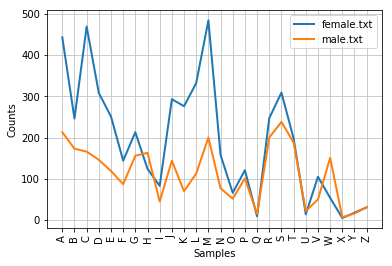

In [156]:
# or look at a frequency distribution, is there a letter more common with men or women's name?
cfd = nltk.ConditionalFreqDist(
    (gender, name[0])
    for gender in names.fileids()
    for name in names.words(gender))
cfd.plot()

It looks like the counts are throwing this off. But we can still see some interesting facets of the data. And we could write a function to look at the percentages. (right?) There are simply more female names in our sample.

In [161]:
len(names.words('male.txt')), len(names.words('female.txt'))

(2943, 5001)

In [163]:
def name_perc():
    import string
    letters = list((string.ascii_uppercase))
    for l in letters:
        ftotal = [n for n in names.words('female.txt') if n[0] == l]
        mtotal = [n for n in names.words('male.txt') if n[0] == l]
        fperc = len(ftotal)/len(names.words('female.txt')) * 100
        mperc = len(mtotal)/len(names.words('male.txt')) * 100
        print (l + '\n   Female percent: ' + str(round(fperc,2)) + '\n   Male percent:   ' + str(round(mperc,2)) +'\n')
 

In [162]:
name_perc()

A
   Female percent: 8.86
   Male percent:   7.24

B
   Female percent: 4.92
   Male percent:   5.88

C
   Female percent: 9.38
   Male percent:   5.64

D
   Female percent: 6.16
   Male percent:   4.96

E
   Female percent: 5.02
   Male percent:   4.04

F
   Female percent: 2.88
   Male percent:   2.96

G
   Female percent: 4.26
   Male percent:   5.3

H
   Female percent: 2.48
   Male percent:   5.54

I
   Female percent: 1.66
   Male percent:   1.53

J
   Female percent: 5.86
   Male percent:   4.89

K
   Female percent: 5.52
   Male percent:   2.38

L
   Female percent: 6.64
   Male percent:   3.84

M
   Female percent: 9.68
   Male percent:   6.8

N
   Female percent: 3.16
   Male percent:   2.62

O
   Female percent: 1.32
   Male percent:   1.77

P
   Female percent: 2.42
   Male percent:   3.43

Q
   Female percent: 0.18
   Male percent:   0.51

R
   Female percent: 4.94
   Male percent:   6.8

S
   Female percent: 6.18
   Male percent:   8.09

T
   Female percent: 3.96
   Male 

When we look further into Machine Learning and Natural Language Processing, we will see how to establish more uniformity to test data.

### WordNet

[WordNet](https://wordnet.princeton.edu/)

WordNet is a large, English, lexical database that groups parts of speech into "synsets" (essentially groups of synonyms) that express a concept (e.g. "bicycle" and "bike"). NLTK provides access to the English WordNet.

In [165]:
# this will give us the sysnset identification for the different concepts that ""bicycle" is used to express.
from nltk.corpus import wordnet as wn
wn.synsets('bicycle')

[Synset('bicycle.n.01'), Synset('bicycle.v.01')]

We can see we have two possibilities. One bicycle as a noun (`bicycle.n.01` with the `n` denoting a noun) and a verb (`bicycle.v.01` with the `v` denoting a verb).

Let's take a closet look at these. Using `lemma_names()` will give us the othe lemma that are assoociated with our term as synonyms.

In [167]:
# we can look at one synset
wn.synset('bicycle.n.01').lemma_names()

['bicycle', 'bike', 'wheel', 'cycle']

In [168]:
# This will show us all of the terms in all of the lemmas
for lm in wn.synsets('bicycle'):
    ls = lm.lemma_names()
    lma = lm
    print (str(lma) + ': ' + str(ls))

Synset('bicycle.n.01'): ['bicycle', 'bike', 'wheel', 'cycle']
Synset('bicycle.v.01'): ['bicycle', 'cycle', 'bike', 'pedal', 'wheel']


We can see a definition of the concept

In [169]:
wn.synset('bicycle.n.01').definition()

'a wheeled vehicle that has two wheels and is moved by foot pedals'

some concepts even have examples of usage.

In [170]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

You can also identify the words by the lemma to eliminate abiguity

In [175]:
#This will show us all the lemmas in the synset bicycle.n.01 
wn.synset('bicycle.v.01').lemmas()

[Lemma('bicycle.v.01.bicycle'),
 Lemma('bicycle.v.01.cycle'),
 Lemma('bicycle.v.01.bike'),
 Lemma('bicycle.v.01.pedal'),
 Lemma('bicycle.v.01.wheel')]

In [172]:
wn.lemma('bicycle.n.01.bike')

Lemma('bicycle.n.01.bike')

In [173]:
# This may seem redundant to us but it is useful for a computer. 
# we can get the lemma from one of its inflected forms.
wn.lemma('bicycle.n.01.bike').synset()

Synset('bicycle.n.01')

Also, we can get all of the lemmas that contain a selected word.

In [174]:
wn.lemmas('bike')

[Lemma('motorcycle.n.01.bike'),
 Lemma('bicycle.n.01.bike'),
 Lemma('bicycle.v.01.bike')]

### Hierarchies

With WordNet synsets we can also look at associations between concepts. Some basic concpets are broad and make up the root, but from that root it is possible to navigate to more specific instances of the root's broader concept.

Let's look at some of the more specific instances of the root concept, the **hyponyms**

In [176]:
bike = wn.synset('bike.n.01')
types_of_bikes = bike.hyponyms()
types_of_bikes

[Synset('minibike.n.01'), Synset('trail_bike.n.01')]

In [172]:
sorted(lemma.name() for synset in types_of_bikes for lemma in synset.lemmas())

['dirt_bike', 'minibike', 'motorbike', 'scrambler', 'trail_bike']

In [176]:
types_of_bikes[0].lemmas()[0].name()

'minibike'

We can also look up the hierarchy at hypernyms. 

In [195]:
bike.hypernyms()

[Synset('motor_vehicle.n.01')]

In [186]:
paths = bike.hypernym_paths()

In [187]:
paths

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('container.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('self-propelled_vehicle.n.01'),
  Synset('motor_vehicle.n.01'),
  Synset('motorcycle.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('conveyance.n.03'),
  Synset('vehicle.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('self-propelled_vehicle.n.01'),
  Synset('motor_vehicle.n.01'),
  Synset('motorcycle.n.01')]]

In [188]:
len(paths)

2

In [191]:
# this looks at one of the two paths to reach our original synset bike.n.01
[synset.name() for synset in paths[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'motorcycle.n.01']

In [190]:
[synset.name() for synset in paths[1]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'conveyance.n.03',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'motorcycle.n.01']

In [197]:
# and we can see the root hypernyms for all the paths
bike.root_hypernyms()

[Synset('entity.n.01')]

Another relationship that can be explored between synsets are the `meronyms` and `holonyms`. `Meronyms` are componets of the term, and `holonyms` are things that contain the term. There are substance and parts for these two lexical relations. a substance consist of what it is made up of, while a part are sections or elements of the term. For example, a part meronym for "bike" is "kick stand". A tree's substance is the type of wood it is.

In [243]:
# this will show all of the meronyms of the "bike.n.01" synset
bike.part_meronyms()

[Synset('kick_starter.n.01'),
 Synset('kickstand.n.01'),
 Synset('mudguard.n.01')]

In [248]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [249]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [237]:
# a bike has no holonyms so let's look at a tree. 
wn.synsets('tree')

[Synset('tree.n.01'),
 Synset('tree.n.02'),
 Synset('tree.n.03'),
 Synset('corner.v.02'),
 Synset('tree.v.02'),
 Synset('tree.v.03'),
 Synset('tree.v.04')]

In [238]:
wn.synset('tree.n.01').lemma_names()

['tree']

In [239]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [240]:
# This can become complicated when diferent synsets of the same word begin to relate to other.
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ':', synset.definition())



batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [241]:
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [250]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

ANother type of relationship exists between verbs, **entailments**. The act of eating involves the act of chewing so the verb "eat" entails the verb "chew". 

In [254]:
wn.synsets('eating')

[Synset('eating.n.01'),
 Synset('eat.v.01'),
 Synset('eat.v.02'),
 Synset('feed.v.06'),
 Synset('eat.v.04'),
 Synset('consume.v.05'),
 Synset('corrode.v.01')]

In [255]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [267]:
wn.synsets('hard')

[Synset('difficult.a.01'),
 Synset('hard.a.02'),
 Synset('hard.a.03'),
 Synset('hard.s.04'),
 Synset('arduous.s.01'),
 Synset('unvoiced.a.01'),
 Synset('hard.a.07'),
 Synset('hard.a.08'),
 Synset('intemperate.s.03'),
 Synset('hard.s.10'),
 Synset('hard.s.11'),
 Synset('hard.s.12'),
 Synset('hard.r.01'),
 Synset('hard.r.02'),
 Synset('hard.r.03'),
 Synset('hard.r.04'),
 Synset('hard.r.05'),
 Synset('heavily.r.07'),
 Synset('hard.r.07'),
 Synset('hard.r.08'),
 Synset('hard.r.09'),
 Synset('hard.r.10')]

In [269]:
wn.synset('hard.a.02').lemmas()

[Lemma('hard.a.02.hard')]

In [270]:
wn.lemma('hard.a.02.hard').antonyms()

[Lemma('soft.a.02.soft')]

In [271]:
wn.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]